### imports

In [1]:
import pickle
import numpy as np
import scipy
import matplotlib.pyplot as plt
from skimage.filters import sobel
from skimage.segmentation import watershed
from skimage import filters
import seaborn as sns
from scipy import ndimage as ndi
from skimage import *
# import seaborn as sns
# import pandas as pd

### settings

In [2]:
sns.set_style('white')
# font = {'family' : 'normal',
#         'weight' : 'bold',
#         'size'   : 2}

# matplotlib.rc('font', **font)
# matplotlib.rcParams.update({'font.size': 2})

import matplotlib.pyplot as plt

SMALL_SIZE = 8
MEDIUM_SIZE = 10
BIGGER_SIZE = 12

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title






### functions

In [3]:

def WS_edt(test_tissue,init_class,min_dist=5):
#     test_tissue = 'A549'
    image = SIMS_dict[test_tissue]
    thresholds = filters.threshold_multiotsu(image, classes=init_class)
    cells = image>thresholds[-1]
    distance = ndi.distance_transform_edt(cells)
    # distance = image

    local_max_coords = feature.peak_local_max(distance, min_distance=min_dist)
    local_max_mask = np.zeros(distance.shape, dtype=bool)
    local_max_mask[tuple(local_max_coords.T)] = True
    markers = measure.label(local_max_mask)

    segmented_cells = watershed(-distance, markers, mask=cells)
    

#     plt.imshow(color.label2rgb(segmented_cells, bg_label=0))
    
#     plt.show()
    return segmented_cells



In [4]:
with open('/home/yzy/bioSIMS/data/Segment_Cut/Cut_256.pickle', 'rb') as handle:
    Cut_mask_dict = pickle.load(handle)
with open('/home/yzy/bioSIMS/data/Segment_SIMS/SIMS_256_rotation.pickle', 'rb') as handle:
    SIMS_dict = pickle.load(handle)
with open('/home/yzy/bioSIMS/data/Segment_Human_256/Human_256_int.pickle', 'rb') as handle:
    Human_mask_dict = pickle.load(handle)

In [5]:
WSedt_mask_dict = {}


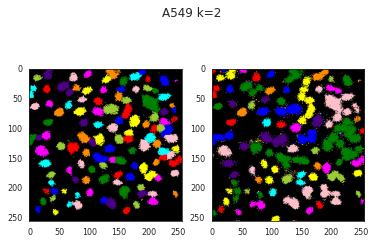

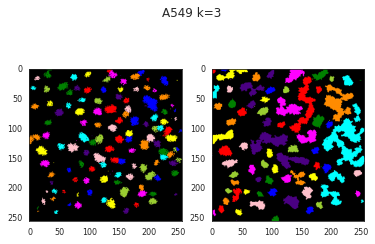

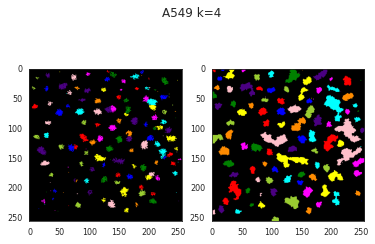

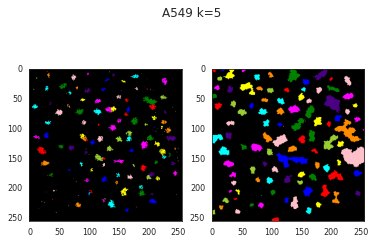

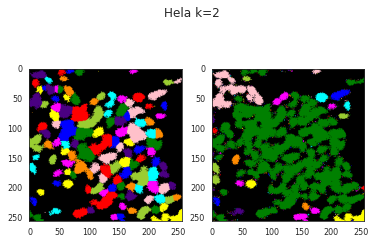

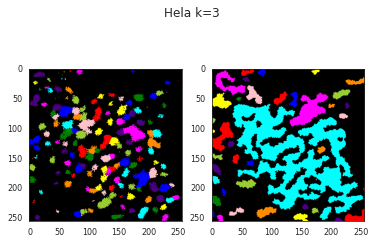

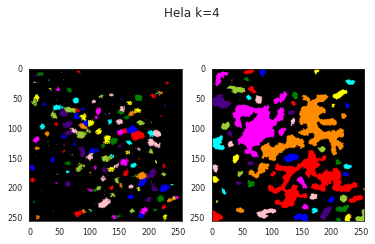

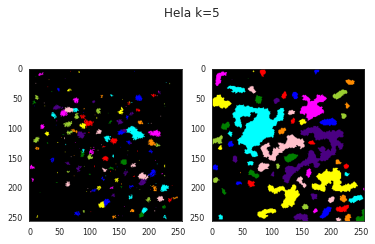

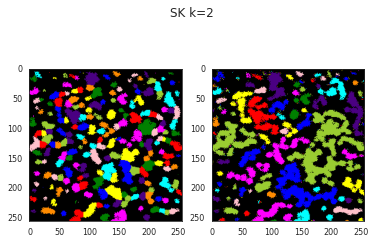

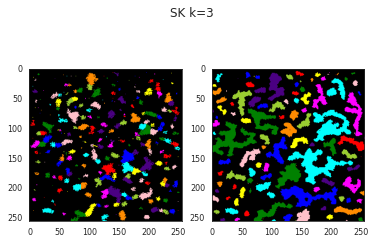

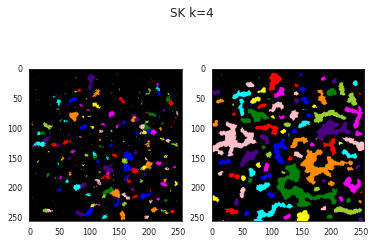

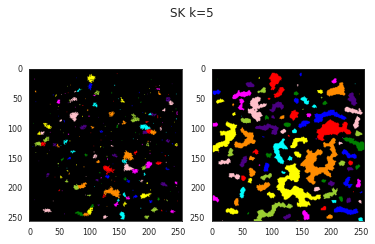

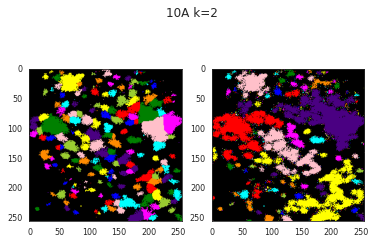

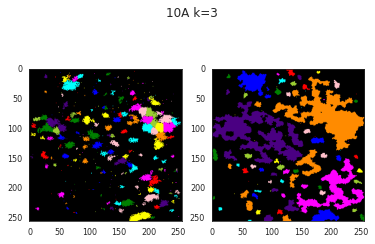

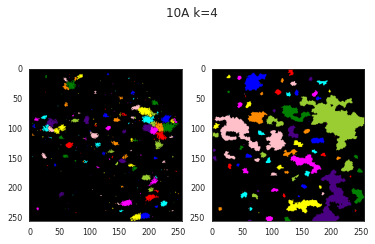

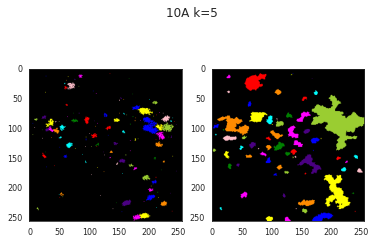

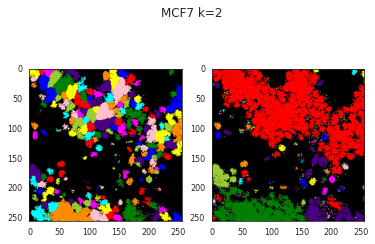

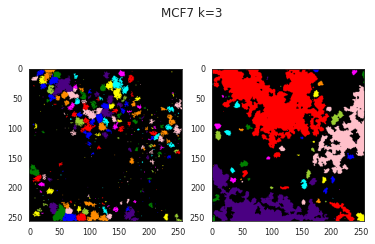

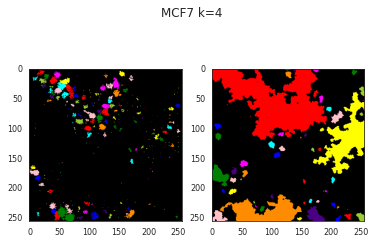

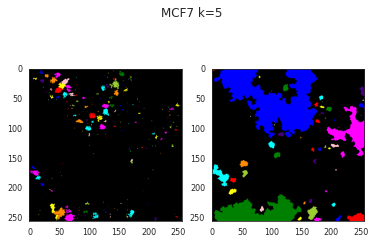

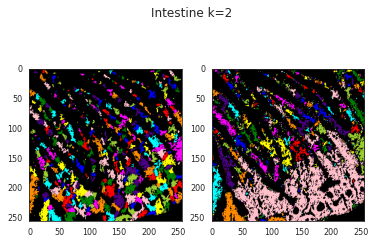

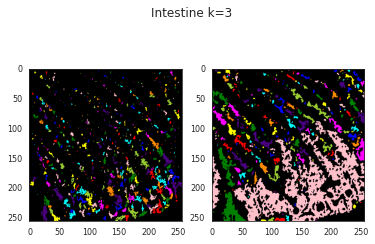

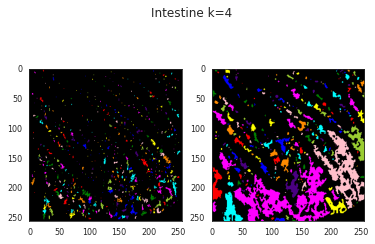

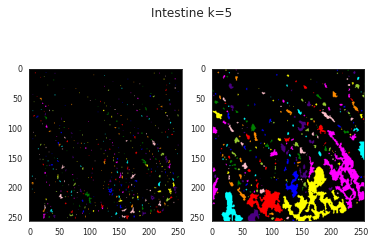

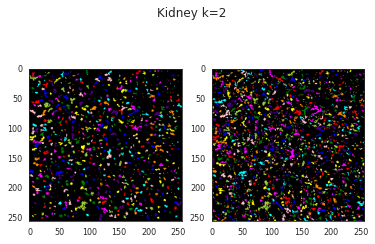

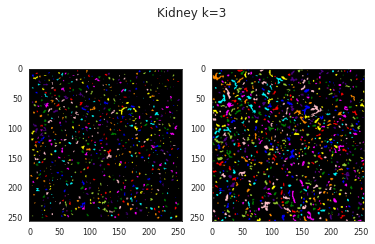

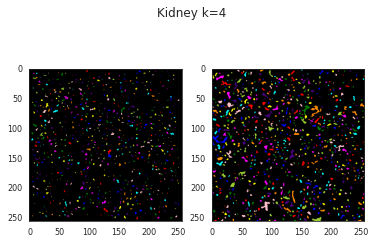

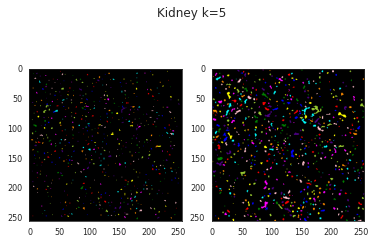

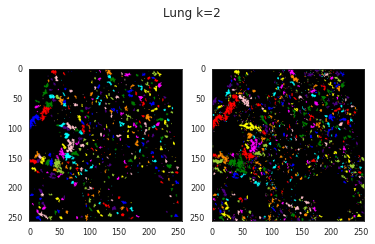

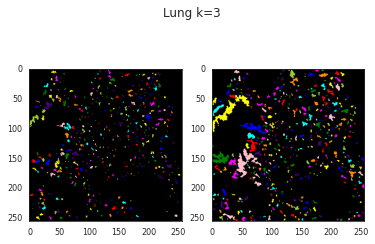

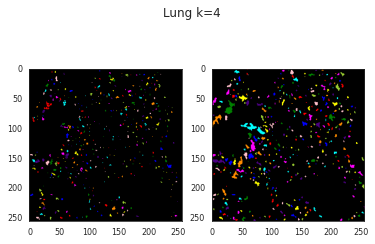

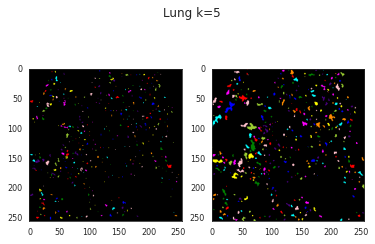

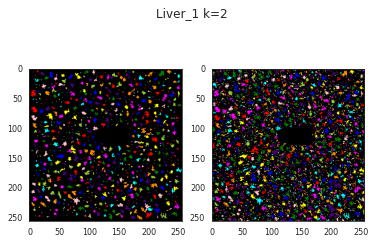

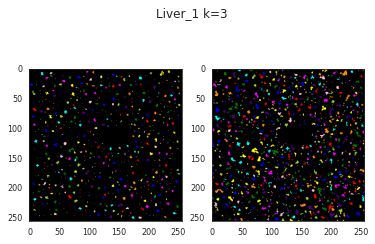

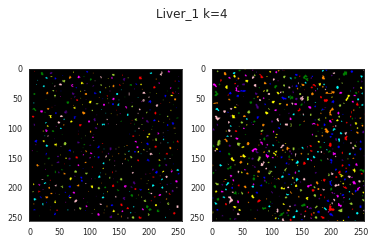

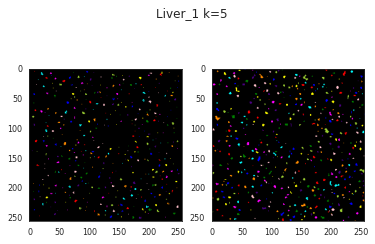

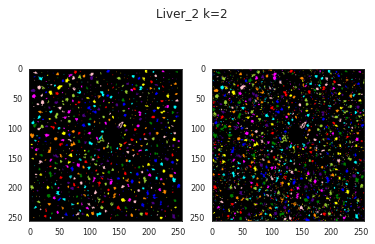

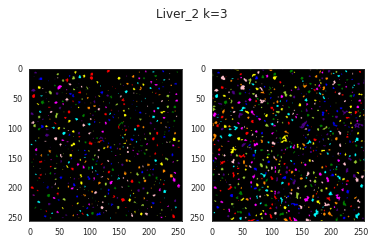

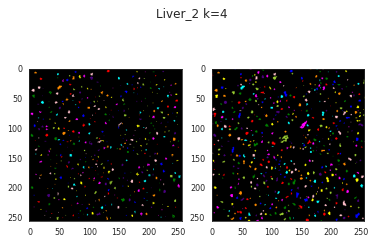

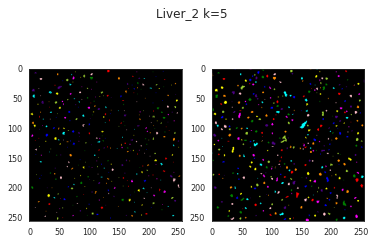

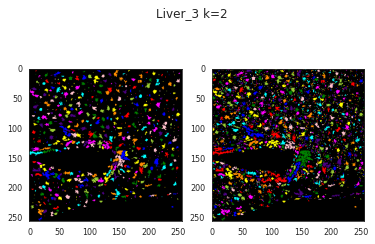

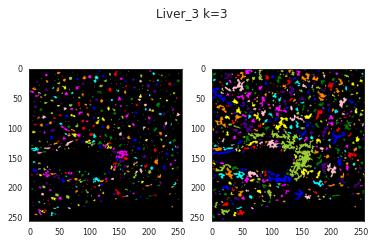

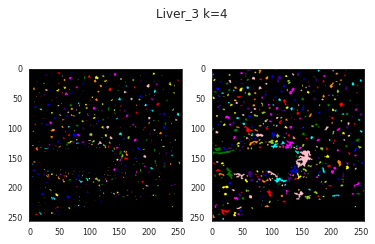

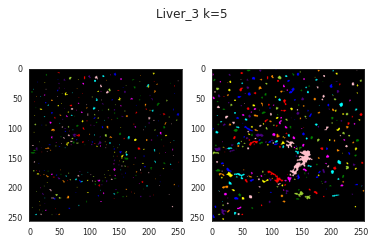

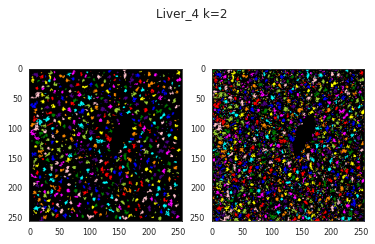

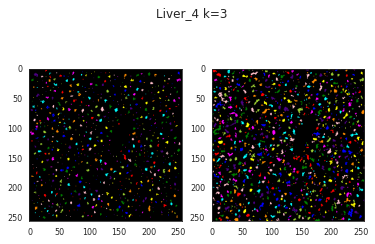

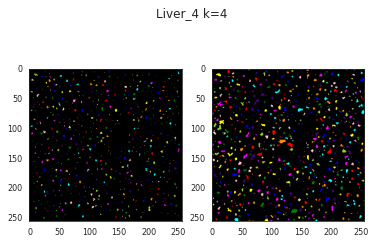

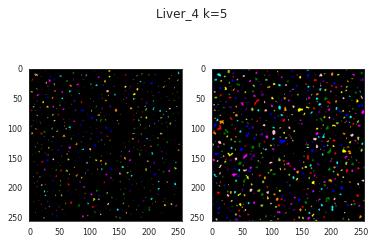

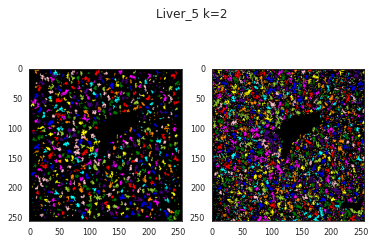

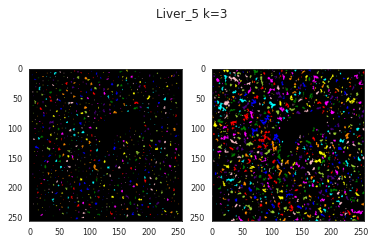

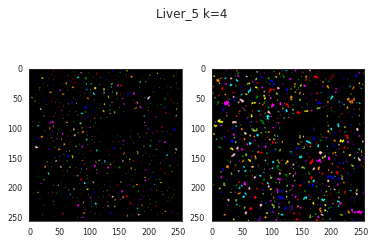

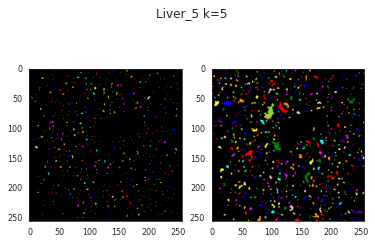

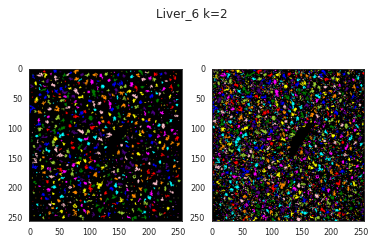

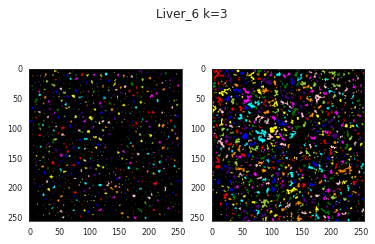

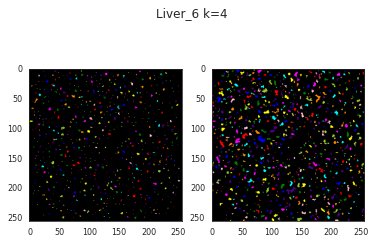

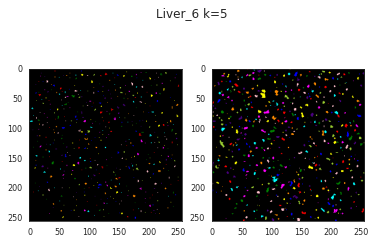

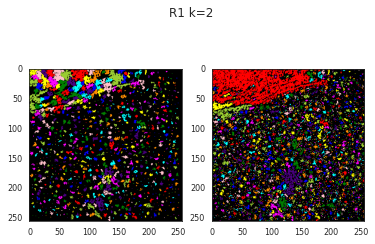

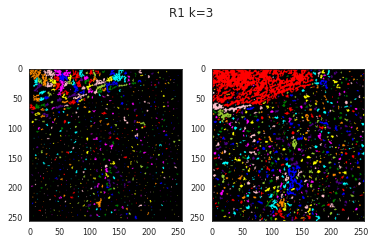

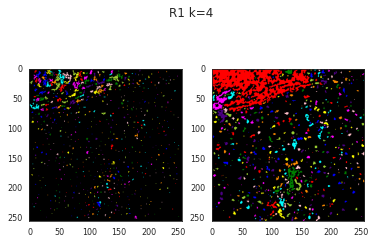

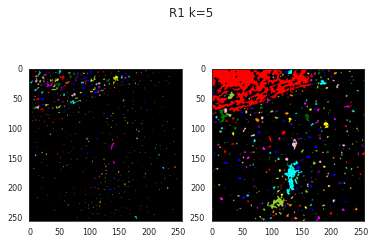

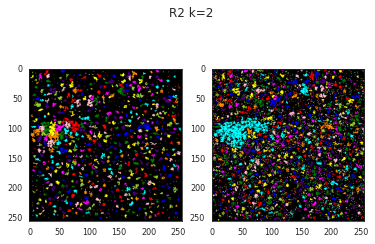

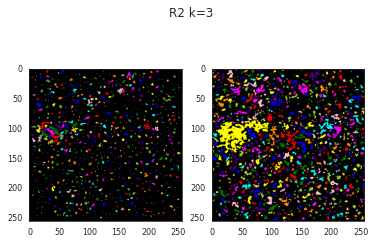

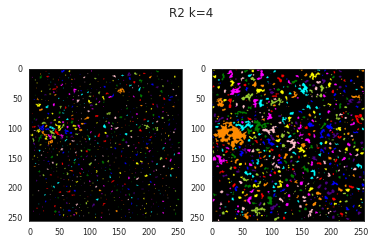

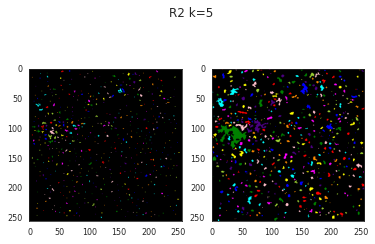

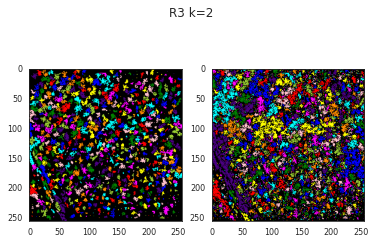

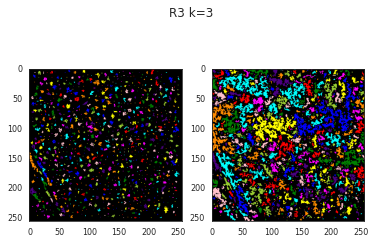

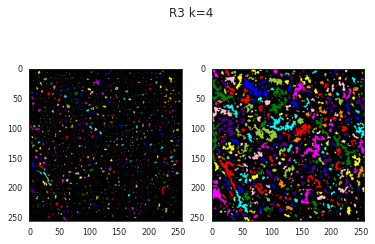

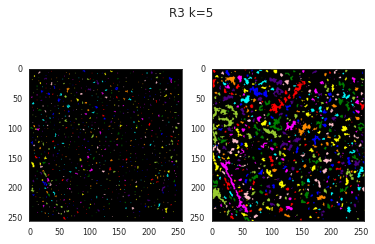

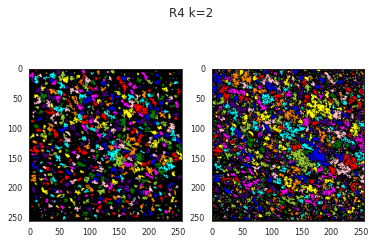

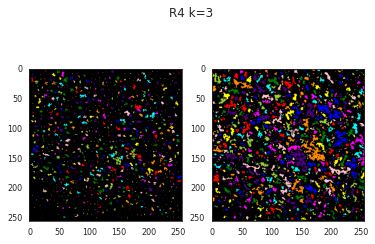

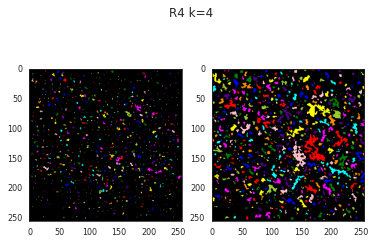

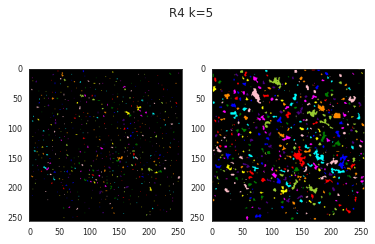

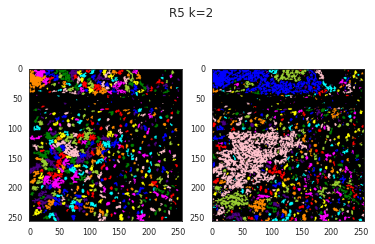

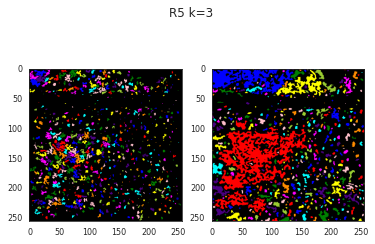

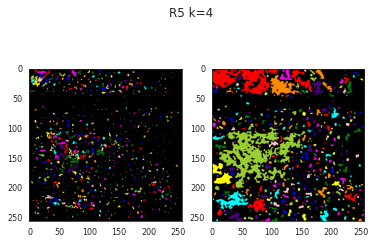

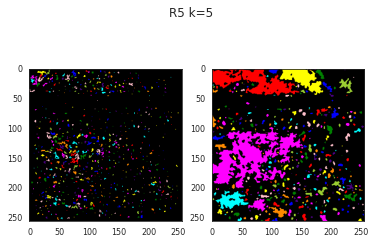

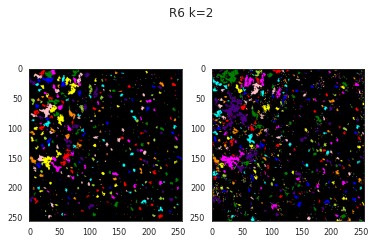

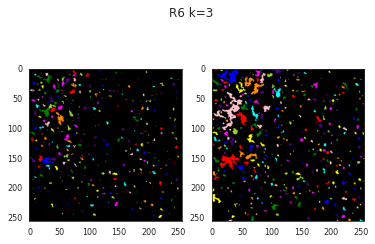

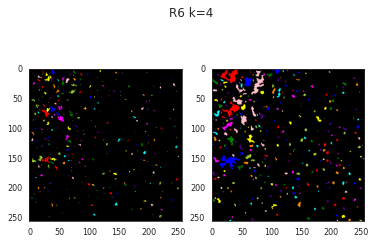

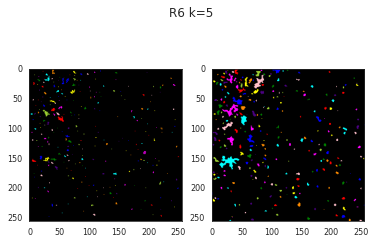

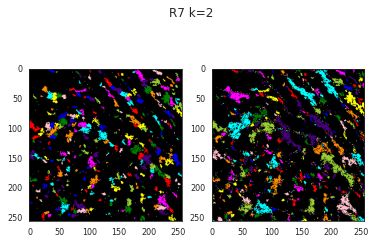

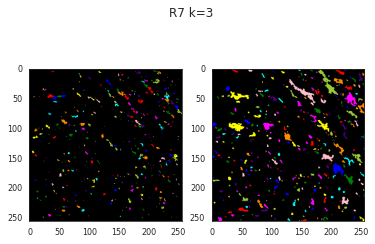

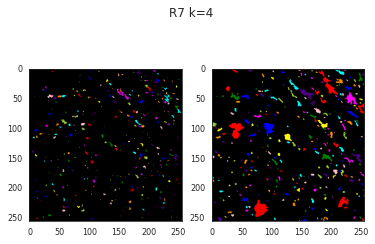

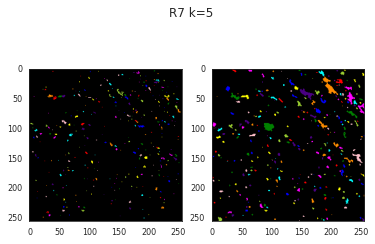

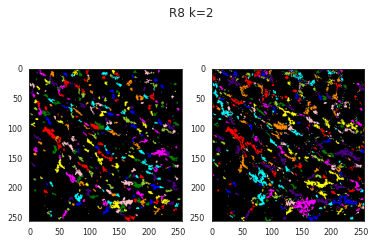

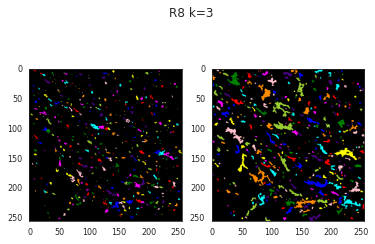

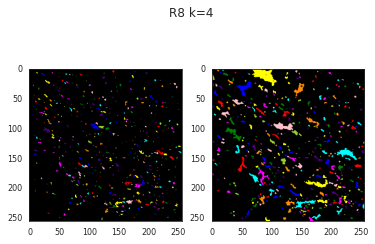

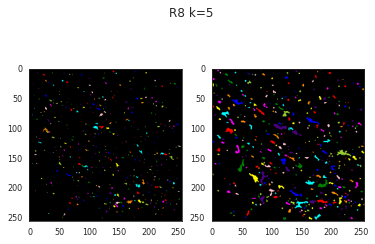

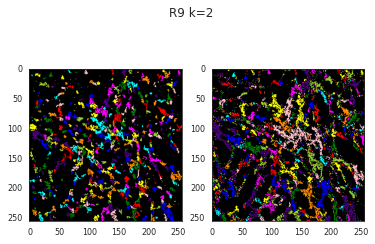

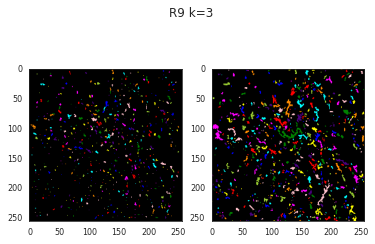

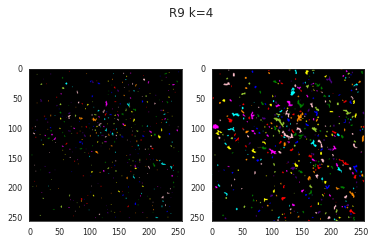

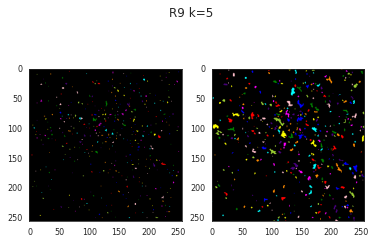

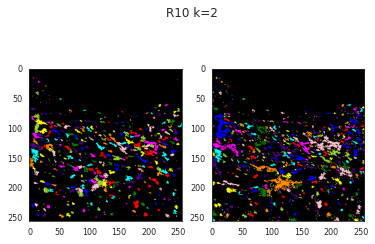

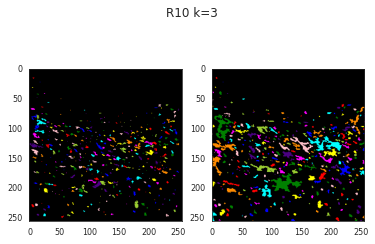

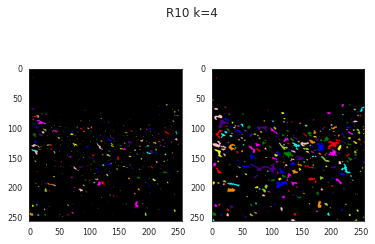

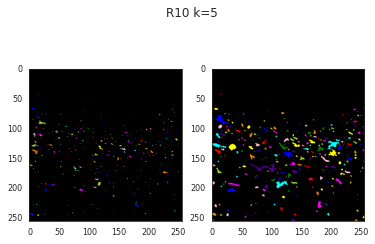

In [7]:
tissue_list = [
    'A549','Hela','SK','10A','MCF7',
    'Intestine','Kidney','Lung',
    'Liver_1','Liver_2','Liver_3','Liver_4','Liver_5','Liver_6',
    'R1','R2','R3','R4','R5','R6','R7','R8','R9','R10'
]
k_range = [2,3,4,5]
for test_tissue in tissue_list:
    WSedt_mask_dict[test_tissue] = {}
    
    for k in k_range:
        img = SIMS_dict[test_tissue]
        WSedt_rst = WS_edt(test_tissue,k)
        
        WSedt_mask_dict[test_tissue][k]=WSedt_rst
        
        fig,axes = plt.subplots(1,2)
        axes[0].imshow(color.label2rgb(WSedt_rst,bg_label=0))
        fig.suptitle('{0} k={1}'.format(test_tissue,str(k)))
        plt.show()

In [8]:
with open('/home/yzy/bioSIMS/data/Segment_WSedt/WSedt_mask.pickle', 'wb') as handle:
    pickle.dump(WSedt_mask_dict, handle, protocol=pickle.HIGHEST_PROTOCOL)
    


In [ ]:
1+1